<a href="https://colab.research.google.com/github/javmohir/Machine_Learning/blob/main/MLga_tayorlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Machine Learning
ML loyiha qadamlari

Esingizda bo'lsa, biz eng birinchi darsimizni Data Science Metodologiyasini o'rganishdan boshlagan edik. ML ham Data Science loyihaning bir qismi bo'lgani sabab, har qanday loyihani bajarishda biz avval ko'rgan metodologiyaga amal qilamiz.

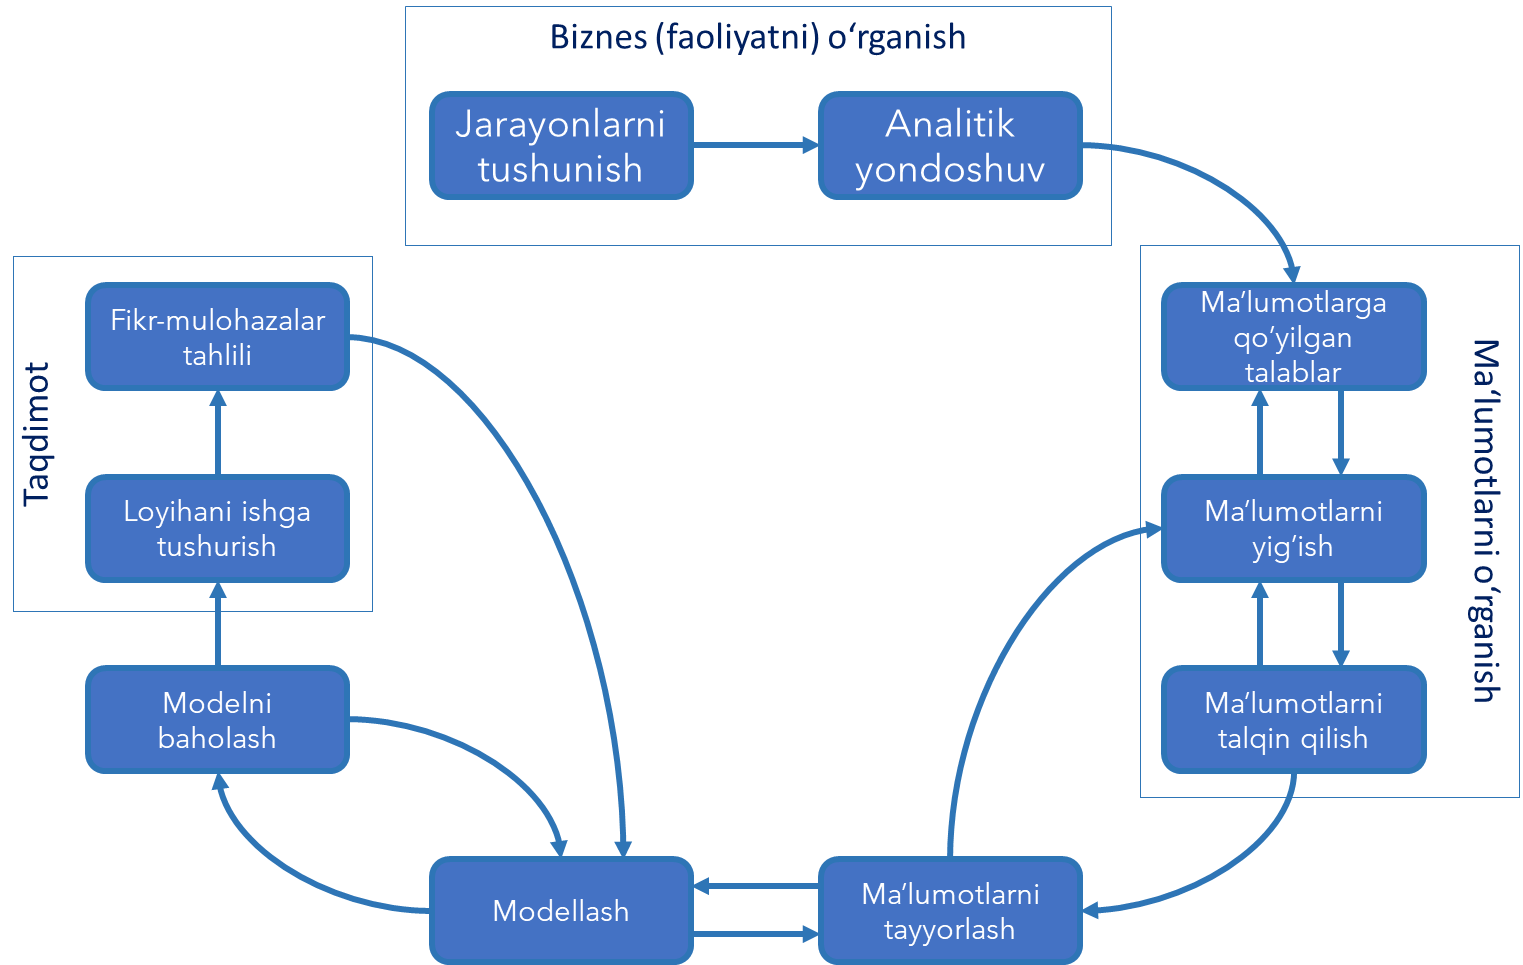

Machine Learning qanday ishlashini tushunish uchun ushbu darsimiz davomida biz bitta loyihani boshidan oxirigacha birgalikda qilamiz.

Dars davomida tushunmagan mavzularga duch kelsangiz, havotir qilmang, kurs davomida juda ko'p masalalarga qayta to'xtalamiz.

1-QADAM. FAOLIYATNI O'RGANISH
Keling boshlanishiga loyiha haqida tasavvur hosil qilaylik.

Sizning buyurtmachingiz "California Inc" Qurilish Kompaniyasi. Kompaniya keyingi uylarini qurishda California shtatining turli hududlarida uylarning o'rtacha narxini hisoblab beruvchi model (dastur) yaratishni so'rayapti.

Sizga berilgan ma'lumotlar: California shtatida aholini ro'yxatga olish uchun o'tkazilgan so'rovnoma natijasi.

Ma'lumotlar Californianing har bir hududi (blok deb ataladi) uchun aholi soni, aholining median daromadi, uylarning median narxi kabi qiymatlarni o'z ichiga oladi. Har bir hududda tahminan 600 dan 3000 gacha aholi yashaydi.

Demak sizning vazifangiz yuqorida ma'lumotlarga asoslangan holda turli hududlarda uylarning median narxini aniqlab beruvchi model (dastur) yaratish

1.1 Jarayonlarni tushunish
Sizning birinchi qiladigan ishingiz, loyiha haqida ko'proq ma'lumot to'plash. Bu sizga loyihaga to'g'ri yondoshish, to'g'ri model tanlash, qanday algoritmlardan foydalanishni aniqlash uchun yordam beradi.

Misol uchun, birinchi savol: Ushbu model qayerda ishlatiladi?
Buyurtmachi sizning modelingdan qaytgan natija boshqa, siz bilmaydigan, ma'lumotlar bilan birgalikda yana boshqa modelning kirishiga ulanishini va yakuniy model ko'rsatilgan hududga investisiya kiritish yoki kiritmaslik haqida qaror qabul qilishini aytdi.

Demak, sizning modelingiz kattaroq modelga ulanar ekan.

Keyingi savol: Hozirda buyurtmachi median narxni aniqlashda qanday usuldan foydalanayapti va joriy usulning aniqligi nechiga teng, uning kamchiliklari nimada?

Javob: Hozirda hudud uchun narxlar bir nechta mutaxassislarning tahliliga asosan, qo'lda aniqlanmoqda. Aniqligi 20%.

Mana endi keyingi bosqichga o'tamiz.

1.2 Analitik yondoshuvni aniqlash
Bu bosqichda biz bir nechta narsalarni aniqlashtirib olamiz:

Model: Supervised, Unsupervised, Reinforcement?
Algoritm: klassifikasiya, regressiya, yoki boshqa turda
Usul: Online yoki offline
Yuqoridagi savollarga javob beramiz:

Supervised learning - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdadi median narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
Regressiya - "Bashorat" (prognoz) dedikmi demak bu regressia algoritmlari yordamida hal qilinadi
Offline - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q.
Model aniqligini qanday baholaymiz?

Aniqlikni baholashning turli usullari bor, regressiya algoritmlar uchun odatda o'rtacha kvadrat xatolik (Root Mean Square Error - RMSE) ko'p ishlatiladi:

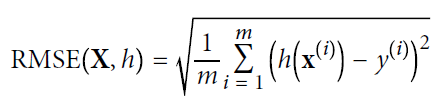

Bu yerda:

�
m - datasetdagi qatorlar soni (har bir qator bitta ma'lumot)
�
(
�
)
x
(i)
  -
�
i-qator uchun barcha parametrlar vektori (label dan tashqari)
�
(
�
)
y
(i)
  -
�
i-qator uchun label (bizdagi misolda median uy narxi)
�
X - labeldan boshqa barcha parametrlar
ℎ
h - sizning modelingizdan qaytgan bashorat (hypothesis).
ℎ
(
�
(
�
)
)
h(x
(i)
 ) -
�
i-qator uchun model qaytargan bashorat.
Aniqlikni baholashning yana bir usuli, o'rtacha absolyut xatolik (mean absolute error - MAE).

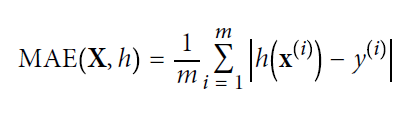

RMSE ham MAE ham ikki vektor, bashorat va label o'rtasidagi farqni hisoblaydi. Xato qancha kam bo'lsa, natija shuncha yaxshi hisoblanadi.

Keyingi bosqichga o'tishdan avval, yuqoridagi xulosalarimizni tasdiqlab olamiz. Sababi, sizning regressiya modelingiz aniq son qaytaradi (uyning bashorat qilingan narxi), lekin buyurtmachi sizdan son emas "qimmat", "arzon", "o'rtacha" kabi qiymatlarni kutgan edi. Bu esa klassifikasiya algoritmi yordamida hal qilinishi kerak edi. Demak, siz modelingizdan qaytadigan natija buyurtmachi kutgan natija bilan bir ekanini aniqlashtirib olamiz.

Kerakli modullarni chaqirib olamiz. Bu safar bizga avvaldan tanish pandas, numpy kutubxonalaridan tashqari, yangi, scikit-learn kutubxonaisini ham chaqiramiz.

scikit-learn - turli Machine Learning algoritmlarni jamlagan kutubxona bo'lib, kelgusida ishimizni bir necha bor osonlashtiradi.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL="https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df=pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Datasetning har bir qatori bu bitta hudud (mahalla, kvartal, blok) haqida ma'lumot. Dataset 10 ta ustundan iborat:

longitude va latitude birgalikda GPS koordinatalar
housing_median_age - uylarning median yoshi
total_rooms - ushbu hududda mavjud jami xonalar
total_bedrooms - ushbu hududda mavjud jami yotoqxonalar
population - hudud aholi soni
households - hududdagi oilalar soni
median_income - median daromad
median_house_values - uylarning median narxi
ocean_proximity - hududning okeanga qanchalik yaqinligi

Ma'lumotlarni ko'ramiz qilamiz

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Yuqoridagi natijadan olingan xulosalar:

Dataset 20640 qatordan iborat (har bir qator bu alohida hudud (blok, mahalla, kvartal))
1. total_bedrooms ustunida ma'lumotlar to'liq emas (20433 qator to'liq, qolgan 207 tasida ma'lumot yo'q)
2. ocean_proximity ustunidan boshqa barcha ustunlar sonli.
3. ocean_proximity ustunini ko'ramiz:

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Ma'lumotlarni tahlil qilishning yana bir usuli - vizualizasiya

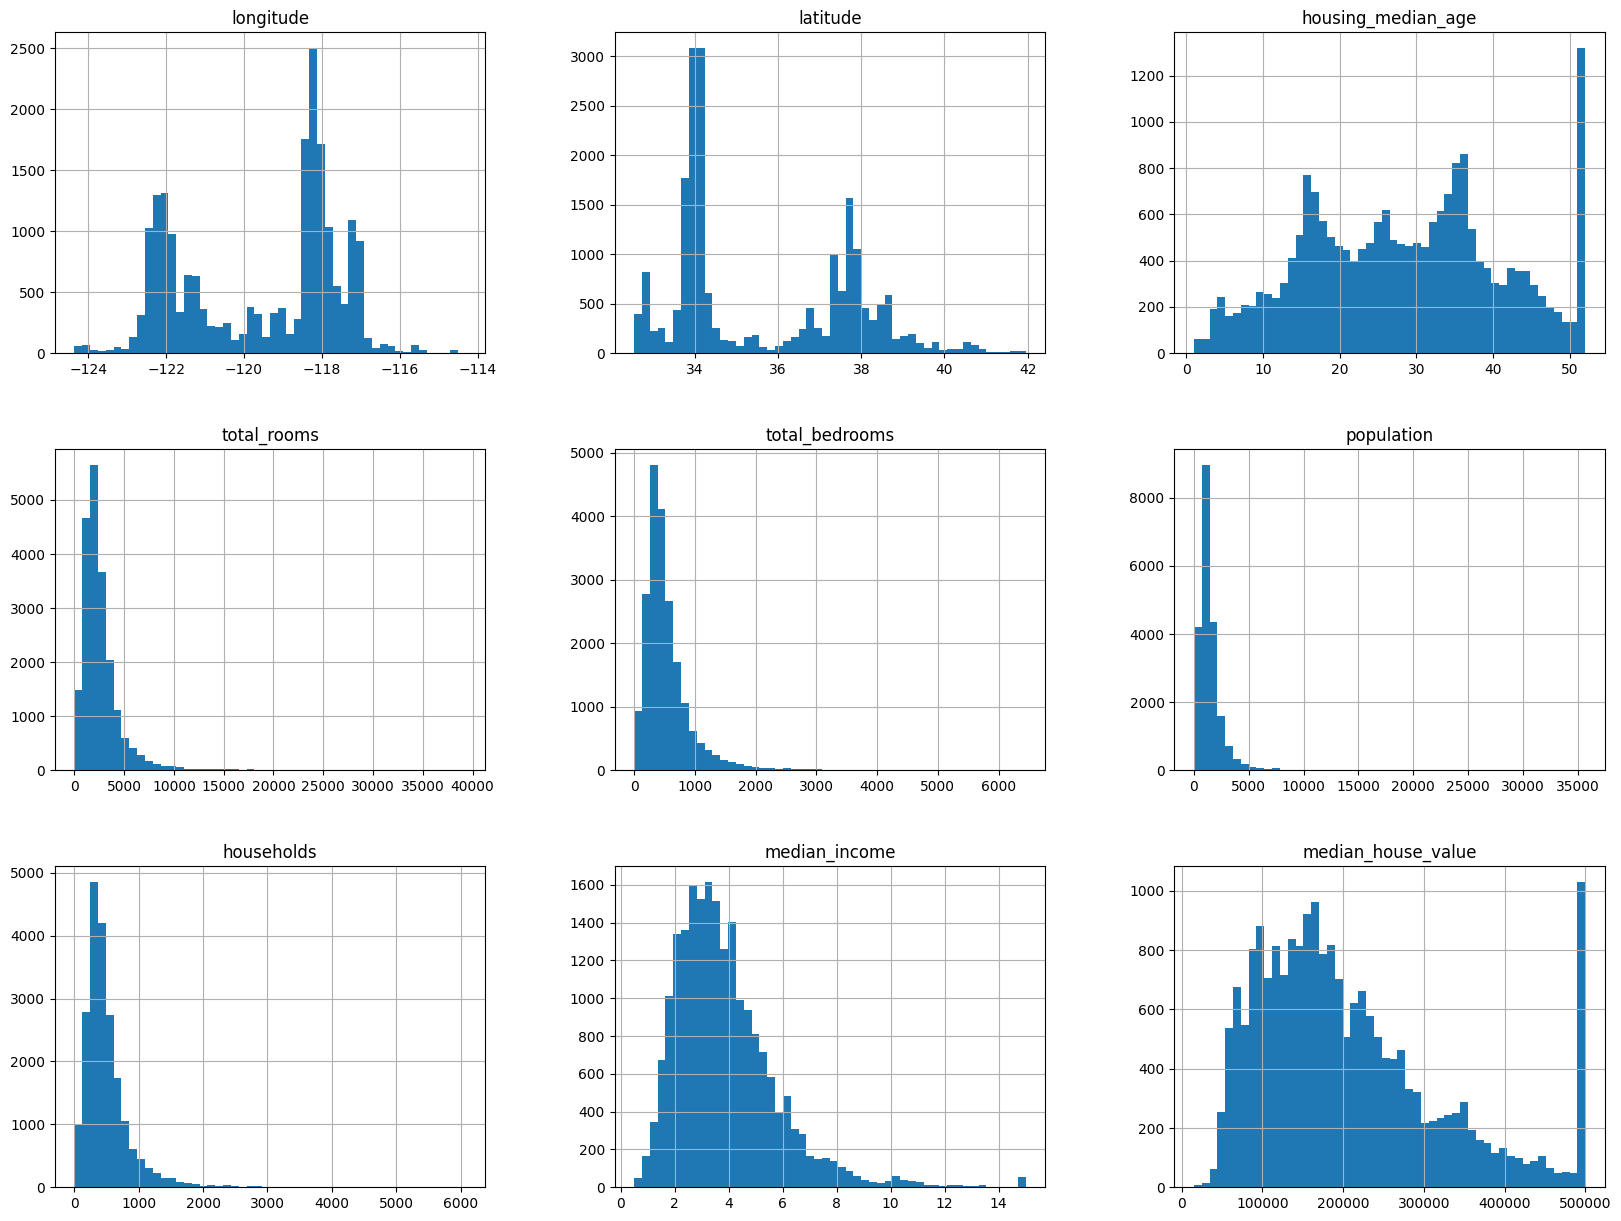

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

Tahlilda davom etamiz:

1. median_income (median daromad) - ustunidagi sonlar tushunarsiz (1 xonali son nimani anglatadi?). Mijoz bilan gaplashgandan so'ng sonlar ming dollarda ekanini bilamiz (ya'ni 4 bu 4000$ degan)
2. housing_median_age (uylarning median yoshi) grafikida 50 yoshli uylar birdan oshib ketgan. Mijozda bilan buni aniqlashtiramiz: ma'lumotlar jamlanganda yoshi 50 dan oshgan barcha uylar 50 deb kiritilgan ekan (orasida 60-70-100 yillik ular ham bo'lishi mumkin). Ya'ni ma'lumotlarga chegara belgilangan.
3. median_house_value (uylarning median narhi) da ham shunday holat, ya'ni narhi 500 000$ dan qimmat uylar hammasi 500ming deb yozib yuborilgan. Bu esa biz uchun yaxshi emas. Sababi, bizning qurgan modelimiz 500mingdan qimmat uylarni to'g'ri baholay olmaydi. Oldimizda 2 yo'l bor:
- Qimmat uylar uchun ma'lumotlarni qayta yig'ish
- 500mingdan qimmat uylar bor hududlarni datasetdan chiqarib tashlash.
4. Ma'lumotlar taqsimoti bir tomonga og'gan (qo'ng'iroqsimon emas), ML uchun normal taqsimot bo'lgani afzal (buni qanday to'g'rilashni kelgusida ko'ramiz)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [ ]:
test_set.shape

(4128, 10)

train_test_split yordamida bo'lishning kamchiligi, ma'lumotlardagi balans yo'qolishi mumkin. Misol uchun, bizdagi datasetda median_income ustuniga qarasak aholining aksari 2000-4000$ oralig'da daromad qilar ekan. 8000 dan ko'proq daromad oladiganlar esa anchagina kam. Agar biz train va test setlarda shu taqisomtni saqlab qolmoqchi bo'lsak StratifiedShuffleSplit obyektiga murojaat qilamiz.

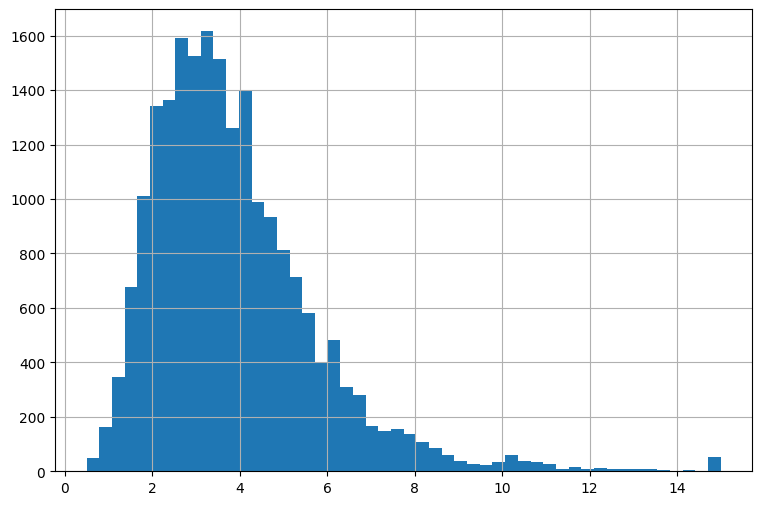

In [ ]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

StratifiedShuffleSplitdan foydalanishdan avval median_income ustunidagi qiymatlarni bir nechta kategoriyalarga ajratib olishimiz kerak. Aynan shu kategoriyalar StratifiedShuffleSplit ichidagi split funksiyasiga uzatiladi va funksiya shu kategoriya asosida train va test set o'rtasidagi balansni saqlaydi.

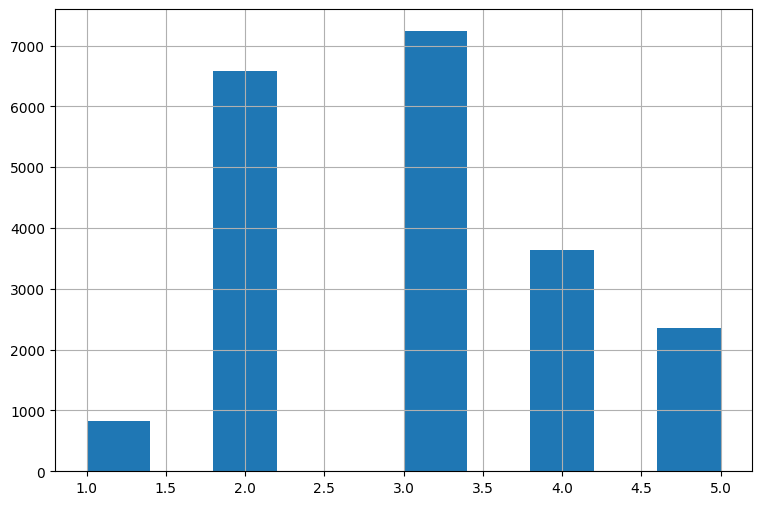

In [ ]:
df['income_cat']=pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
19781,-122.81,40.93,16.0,2050.0,471.0,588.0,195.0,2.7083,88900.0,INLAND,2
16886,-122.39,37.59,33.0,2064.0,299.0,813.0,303.0,6.0374,500001.0,NEAR OCEAN,5
12808,-121.47,38.63,29.0,2197.0,520.0,1374.0,483.0,2.1889,69300.0,INLAND,2
10746,-117.88,33.63,21.0,9565.0,2289.0,3162.0,1831.0,4.7024,345400.0,<1H OCEAN,4
8041,-118.16,33.84,36.0,2444.0,432.0,1199.0,424.0,4.1538,218800.0,<1H OCEAN,3


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_splid = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_splid.split( df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


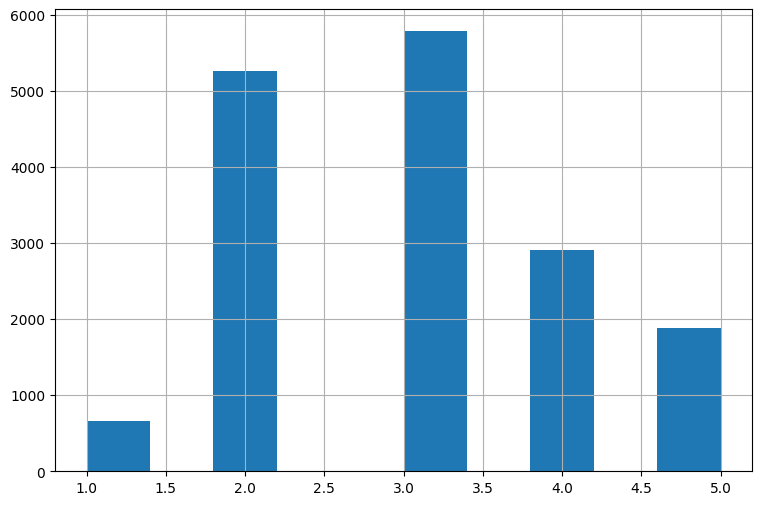

In [ ]:
strat_train_set['income_cat'].hist(figsize=(9,6))
plt.show()

income_cat ustuni endi kerak emas, train va test setlardan o'chirib tashlaymiz.

In [ ]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

Ma'lumotlarni tahlil qilamiz.
Keling endi bevosita ma'lumotlarni tahlil qilishga o'taylik. Esingizda bo'lsa biz endi train set bilan ishlashimiz kerak. Bizda hozircha 2 ta alohida train set bo'lib qoldi:

train_set - train_test_split yordamida bo'lingan (muvozanatsiz)
strat_train_set - StratifiedShuffleSplit yordamida bo'lingan.
Biz ikkinchi setdan foydalanamiz. Qulaylik uchun bu setimizda nusxa ko'chirib olamiz.

In [ ]:
housing=strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


Vizualziasiya
Ma'lumotlarni tahlil qilishning eng qulay usuli bu grafiklar.

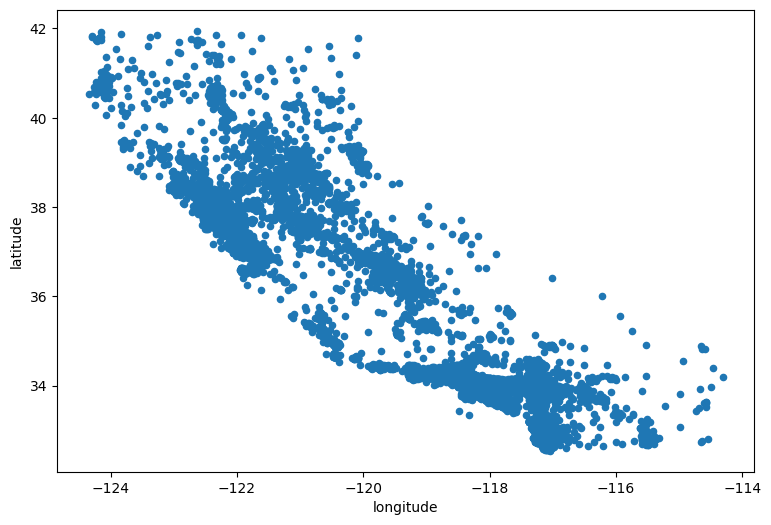

In [19]:
housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(9,6))
plt.show()

Yaxshi, lekin bu ko'rinihsda ko'p ma'lumot ololmaymiz. Yagona xulosamiz, okeanga yaqin aholi zichroq ekan.

Keling grafikka biroz ma'no beramiz.

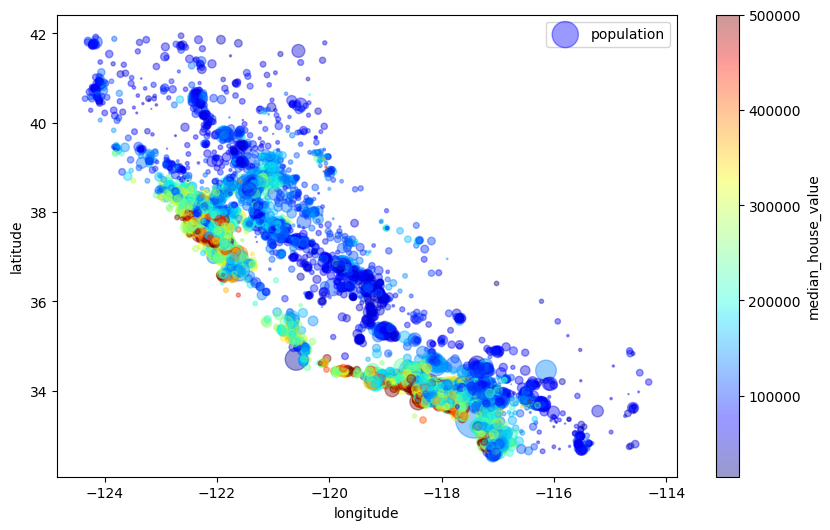

In [20]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing['population']/50, # nuqta radiusi aholi soniga qarab o'zgaradi
    label='population',
    c='median_house_value', # nuqta rangi uyning narxiga qarab o'zgaradi
    cmap="jet", # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(10,6)
)
plt.show()

Bunisi ancha yaxshiroq. Grafikdon qanday xulosalar olishimiz mumkin?

Okeanga yaqin joylarda uylarning ham narxi qimmatroq
Okeanga yaqin hududlarda aholi zichroq

Korrelyasiya
Bizning asl maqsadimiz bizga berilgan ma'lumotlar orasida uyning narxiga ta'sir qiluvchi parametrlarni topish. Bunda esa bizga aynan korrelyasiya juda qo'l keladi.

Korrelysasiya haqida biz Data Analysis kursimizda batafsil to'xtalganmiz.

In [21]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-21-06005d947a51>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
dtype: float64

Ko'rishimiz mumkinki, median_house_value va median_income, total_rooms, housing_median_age ustunlari orasida korrelyatsiya nisbatan kuchli.

seabron tarkibidagi pairplot funksiyasi yordamida korrelyasiya qiymatlarini grafik ko'rinishida chiqarishimiz ham mumkin.

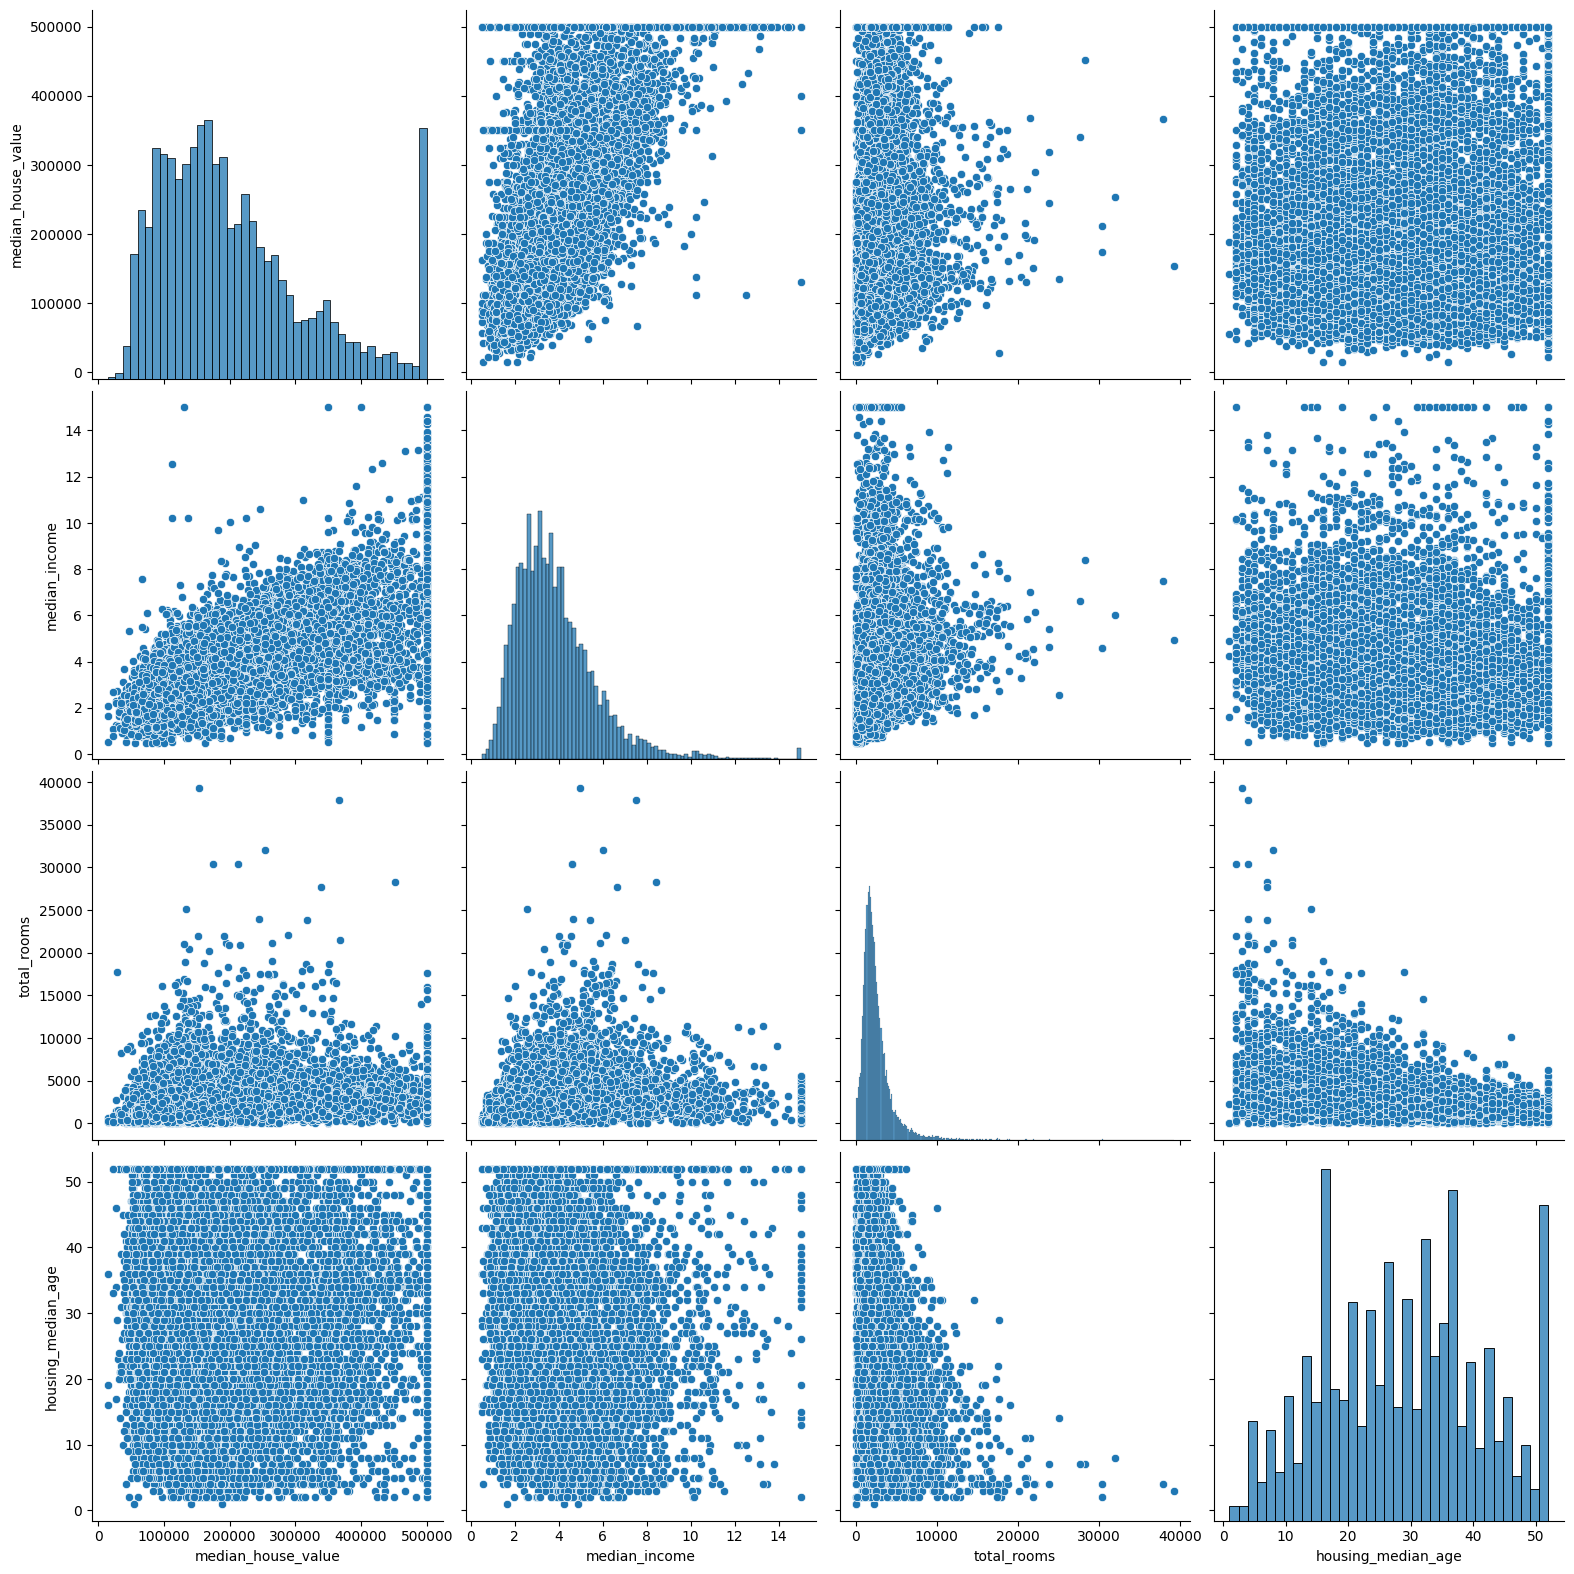

In [23]:
cols=['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=4)
plt.show()

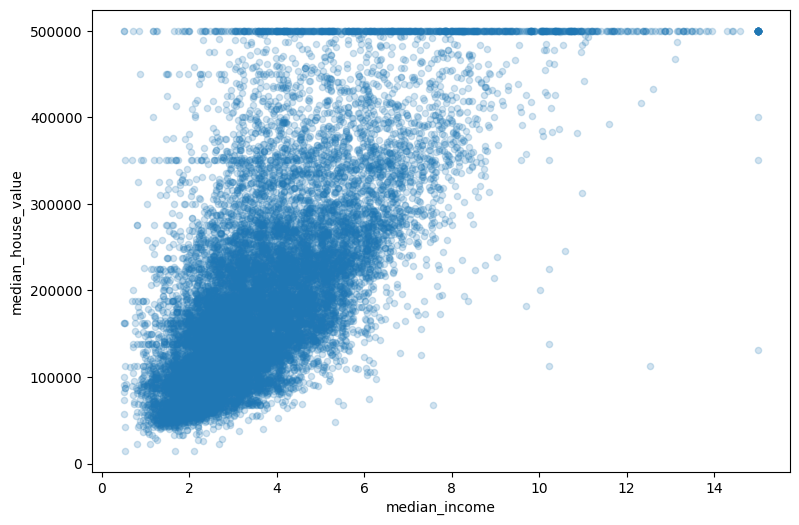

In [24]:
housing.plot(kind="scatter", x='median_income', y="median_house_value", alpha=0.2, figsize=(9,6))
plt.show()

Grafikda kuchli korrelyasiya borligini ko'rishimiz mumkin. Ya'ni hudud bo'yicha aholining daromadi oshgani sari, hududdagi narxlar ham oshgan.

LEKIN, avval aytganimizdek 500,000$ dan qimmat uylar 500mingda chegaralab qo'yilgan. Undan tashqari 350ming va 450ming atrofida ham shunday chegarani ko'rishimiz mumkin (seizlar-sezilmas gorizontal chiziq).

Keyingi bosqichlarda bu qiymatlarni olib tashlashimiz kerak bo'ladi. Aks holda modelimiz ham xato ishlaydi.

Yangi parametrlar yaratamiz
1. Yuqorida median_income uylarning median bahosini topish uchun yaxshi parametr ekanini ko'rdik, lekin bu parametrning o'zi yetarli emas. Shunday holatlarda ba'zi parametrlani jamlab yangi parametrlar hosil qilishimiz mumkin.

Misol uchun, hududdagi jami xonalar soni (total_rooms) unchalik ham muhim emas, lekin jami xonalar sonini jami xonadonlar (households) soniga bo'lsak har bir xonadon uchun o'rtacha xonalar soni chiqadi (ya'ni har bir uyning o'rtacha xonalari soni) bu esa uyning bahosini aniqlashda muhim bo'lishi mumkin.

In [25]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [26]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-26-06005d947a51>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
dtype: float64